**Abstract**:


This notebook is designed for creating a neural network to classify images from the TMNIST dataset. The goal here is to conduct classification on the TMNIST dataset using Convolutional Neural Networks and Dense Neural Networks (DNN)



**DATASET:**

The Typography MNIST (TMNIST) dataset comprises MNIST-style images depicting 94 alphabetic characters and symbols. These characters include digits 0-9, lowercase and uppercase letters from 'a' to 'z' and 'A' to 'Z', along with various symbols such as '!', '"', '#', '$', '%', and more.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.1.1
    Uninstalling keras-3.1.1:
      Successfully uninstalled keras-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, accuracy_score
np.random.seed(42)

2024-04-10 00:31:52.849393: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 00:31:52.849490: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 00:31:53.016043: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**IMPORTING DATASET**

In [4]:
data_path = "/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv"
data = pd.read_csv(data_path)

In [8]:
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print(f"The Shape of the Dataframe is: {data.shape}")

The Shape of the Dataframe is: (274093, 786)


In [12]:
print(f"unique characters in the Dataset: {len(data.labels.unique())}")

unique characters in the Dataset: 94


**DATASET CHARACTERISTICS**

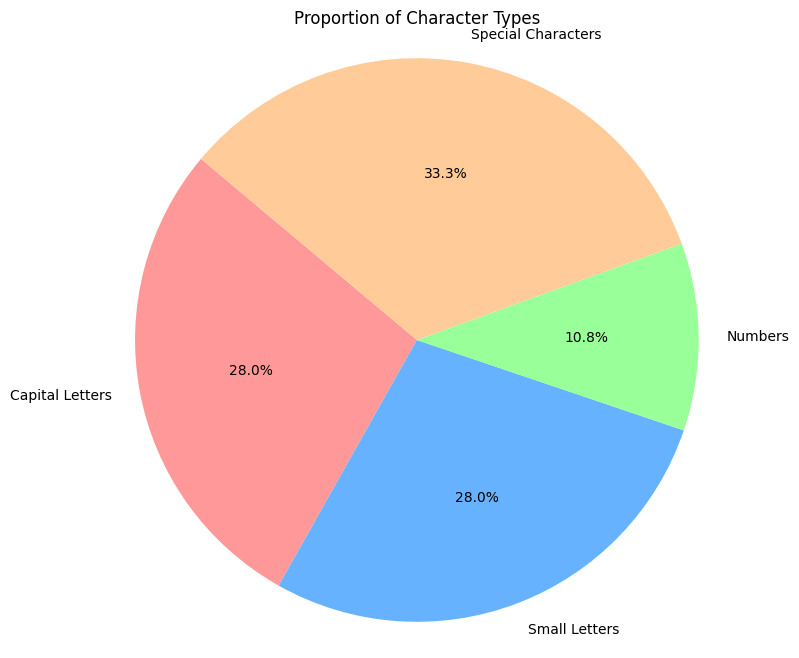

In [13]:
import matplotlib.pyplot as plt
import re

# Sample data
all_labels = data['labels'].unique()

# Combine all labels into a single string
all_labels_str = ''.join(map(str, all_labels))

# Define regular expressions
capitalS_regex = re.compile(r"[A-Z]")
small_regex = re.compile(r"[a-z]")
numbers_regex = re.compile(r"[0-9]")
special_characters_regex = re.compile(r"[\W]|[\_\,]")

# Count matches using regular expressions
counts = [
    len(capitalS_regex.findall(all_labels_str)),
    len(small_regex.findall(all_labels_str)),
    len(numbers_regex.findall(all_labels_str)),
    len(special_characters_regex.findall(all_labels_str)) - 1  # Subtract 1 for the empty space character
]

# Plotting Pie Chart with Custom Colors
characters = ["Capital Letters", "Small Letters", "Numbers", "Special Characters"]
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']  # Specify custom colors

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=characters, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Character Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Capital Letters: Represented by the Pink segment, accounting for 28.0% of the dataset.

Small Letters: Depicted by the blue segment, also comprising 28.0% of the dataset.

Numbers: Shown in the green segment, constituting 10.8% of the dataset.

Special Characters: Presented in the orange segment, making up the largest proportion at 33.3% of the dataset.

In [14]:
X = data.drop(columns=['names','labels']).values

# Assigning Classes
y = data[['labels']].values

Dropping redundant coloums like names and labels from the training frames and keeping only pixel values. The class labels are extracted into a separate variable called y

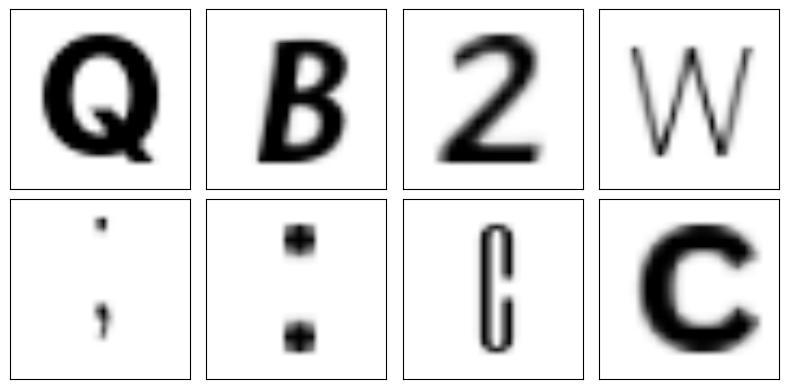

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Number of random images to display
num_images = 8

# Get random indices for the images
random_indices = np.random.choice(len(X), num_images, replace=False)

# Reshape the random subset of input data X into images
X_images = X[random_indices].reshape(-1, 28, 28)

# Create a figure and axes for subplots with smaller size
fig, axs = plt.subplots(2, 4, figsize=(8, 4))

# Iterate over the axes and plot images
for i, ax in enumerate(axs.flat):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(X_images[i], cmap="Greys", interpolation='bilinear')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()



We selects 8 random images from a dataset, reshapes them into 28x28 pixel images, and displays them in a 2x4 grid with small, clear visualization using grayscale and bilinear interpolation.

In [17]:
from sklearn.model_selection import train_test_split

# Splitting Dataset into Training and Testing in 85% and 15% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Reshape the target labels
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))


The code splits the dataset 'X' and corresponding target labels 'y' into training and testing sets, with 85% for training and 15% for testing, ensuring consistent splits with a random seed of 42. The target labels are reshaped to match the training and testing data dimensions.

In [18]:
import pandas as pd

# Convert y_train and y_test to pandas Series
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Convert labels to one-hot encoding using pd.get_dummies
y_train_label = pd.get_dummies(y_train_series)
y_test_label = pd.get_dummies(y_test_series)


We convert the target labels 'y_train' and 'y_test' into pandas Series and then applies one-hot encoding using 'pd.get_dummies', creating binary columns for each unique label. It prints the dimensions of the resulting one-hot encoded training and testing label datasets for verification.

In [19]:
import numpy as np

# Normalize pixel values by dividing by 255
X_train_normalized = np.true_divide(X_train, 255)
X_test_normalized = np.true_divide(X_test, 255)


We normalize the pixel values of the training and testing images by dividing each pixel value by 255, which scales the values to be between 0 and 1. This normalization is often performed to aid in training machine learning models, improving convergence and performance.

**DNN MODEL**

What is a DNN model ?


A Deep Neural Network (DNN) learns patterns from data through hidden layers with ReLU activations. It predicts outputs via an output layer and adjusts weights with backpropagation, optimized by algorithms like Adam. DNNs are effective for tasks such as image recognition and natural language processing, evaluated on metrics like accuracy.

**Working of a DNN Model:**

The DNN processes input data through the layers, learning hierarchical patterns.
Each neuron in a layer computes a weighted sum of inputs, applying the activation function(RELU).

The model predicts class probabilities using the 'softmax' activation in the output layer for multi-class classification.

During training, the model minimizes the 'categorical_crossentropy' loss using 'Adam' optimizer and backpropagation, adjusting weights.


In [20]:
import tensorflow as tf

# Define the Deep Neural Network (DNN) model with adjustable parameters
num_neurons = 512
dropout_rate = 0.2

dnnmodel = tf.keras.Sequential([
    tf.keras.layers.Dense(num_neurons, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_neurons // 2, activation='relu'),  # Half the neurons of the previous layer
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_neurons // 4, activation='relu'),  # Quarter the neurons of the previous layer
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_neurons // 8, activation='relu'),  # Eighth the neurons of the previous layer
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(y_train_label.shape[1], activation='softmax')
])

# Compile the DNN model
dnnmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


The first Dense layer has num_neurons (512) neurons with the ReLU activation function.

A Dropout layer follows with a dropout rate of dropout_rate (0.2), randomly deactivating 20% of the neurons during training to prevent overfitting.

The second Dense layer has num_neurons // 2 neurons, which is half the number of neurons of the previous layer.

**Output Layer:**

The final Dense layer has neurons equal to the number of unique classes in the target labels

It uses the 'softmax' activation function, which produces a probability distribution over the classes, representing the model's confidence in its predictions.

dnnmodel.compile() configures the model for training.

loss='categorical_crossentropy' sets the loss function to be minimized during training, suitable for multi-class classification problems.

optimizer='adam' selects the 'Adam' optimizer, an efficient and widely-used optimization algorithm.

metrics=['accuracy'] specifies that during training, the model should track and display the accuracy metric, which measures the model's performance.



In [21]:
dnnmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

The model is relatively deep, consisting of five layers: one input layer, three hidden layers, and one output layer.

Each hidden layer progressively reduces the number of neurons, starting from 512 to 256, 128, and finally 64.

This reduction in neurons helps in learning hierarchical representations of the input data, potentially capturing both low-level and high-level features.

**Dropout Regularization**:

Dropout layers with a dropout rate of 0.2 are added after each Dense layer.

Dropout regularization helps prevent overfitting by randomly deactivating a fraction of neurons during training, forcing the model to learn more robust and generalizable patterns.

**Output Layer:**

The output layer has 94 neurons, which indicates a multi-class classification task with 94 unique classes.

The 'softmax' activation function in the output layer produces probabilities for each class, allowing the model to make predictions across multiple classes.

The model is compiled with the 'categorical_crossentropy' loss function, suitable for multi-class classification.

The 'Adam' optimizer is chosen for updating the weights during training, known for its efficiency and ability to handle sparse gradients.


In [22]:
dnn_result = dnnmodel.fit(X_train, y_train_label, epochs=12, batch_size=64, verbose=1, validation_split=0.1)

Epoch 1/12


I0000 00:00:1712709379.165935      99 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3277/3277 [==============================] - 18s 4ms/step - loss: 2.4014 - accuracy: 0.4399 - val_loss: 0.7630 - val_accuracy: 0.7662
Epoch 2/12
3277/3277 [==============================] - 13s 4ms/step - loss: 0.9751 - accuracy: 0.7189 - val_loss: 0.6283 - val_accuracy: 0.7919
Epoch 3/12
3277/3277 [==============================] - 14s 4ms/step - loss: 0.8385 - accuracy: 0.7577 - val_loss: 0.5634 - val_accuracy: 0.8121
Epoch 4/12
3277/3277 [==============================] - 13s 4ms/step - loss: 0.7858 - accuracy: 0.7722 - val_loss: 0.5359 - val_accuracy: 0.8294
Epoch 5/12
3277/3277 [==============================] - 14s 4ms/step - loss: 0.7539 - accuracy: 0.7813 - val_loss: 0.5769 - val_accuracy: 0.8232
Epoch 6/12
3277/3277 [==============================] - 13s 4ms/step - loss: 0.7423 - accuracy: 0.7853 - val_loss: 0.5509 - val_accuracy: 0.8238
Epoch 7/12
3277/3277 [==============================] - 13s 4ms/step - loss: 0.7316 - accuracy: 0.7888 - val_loss: 0.5311 - val_accuracy: 0.8

**Epoch 1:**

The model starts with relatively high training loss but achieves decent validation accuracy, indicating it is learning some patterns.

**Epoch 2-4:**

The training loss decreases, indicating that the model is improving its predictions on the training data.

Validation accuracy also improves, reaching around 81-82% by the 4th epoch.

This suggests that the model is learning relevant patterns and generalizing well to unseen data.

**Epoch 5-12:**

Both training and validation metrics stabilize, indicating that the model has learned the relevant patterns in the data.

This suggests that the model has converged and is performing consistently on both the training and validation datasets.

In [23]:
score = dnnmodel.evaluate(X_test, y_test_label, verbose = 0)
print(f"Accuracy of DNN on Test Dataset is :{round(score[1],4)*100}%")

Accuracy of DNN on Test Dataset is :83.71%


**CONCLUSION FOR DNN Model:**

The model appears to perform reasonably well with the provided settings. It acheived an accuracy of 83.71%. The decreasing loss and increasing accuracy on both training and validation datasets indicate that the model is learning and generalizing effectively.

**CNN MODEL**

What is a CNN Model?


A Convolutional Neural Network (CNN) is a type of deep learning model specifically tailored for tasks involving images. It processes images in a way that mimics how the human brain processes visual information, learning to detect features like edges, textures, and shapes. By using layers called convolutions and pooling, CNNs can efficiently learn and extract intricate patterns from images, making them ideal for tasks such as image classification, object detection, and image segmentation. This specialized architecture allows CNNs to achieve high accuracy in recognizing and understanding visual content.

**Why use CNN over DNN ?**

A Convolutional Neural Network (CNN) is tailored for image tasks, capturing spatial features like edges and textures. Compared to a standard Deep Neural Network (DNN), CNNs automatically learn these features through specialized layers, resulting in better accuracy for image-related tasks

In summary, CNNs are preferred for image-related tasks due to their ability to capture spatial features and achieve high accuracy. However, they require more computational resources and larger datasets. On the other hand, DNNs are versatile and easier to interpret, but they may struggle with spatial understanding and have a higher risk of overfitting, especially in image tasks.

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Separate features (X) and labels (y)
X = data.drop(columns=['names', 'labels']).values
y = data['labels'].values

# Normalize pixel values
X = X / 255.0

# Convert labels to one-hot encoding
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Reshape the data for CNN (assuming 28x28 images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


**Preprocessing the data:**

The pixel values in the features (X) are normalized to a range of [0, 1] by dividing by 255.0.

This normalization ensures that all pixel values lie within the same scale, aiding in model convergence.

**One-Hot Encoding Labels:**

The labels (y) are converted from categorical labels into one-hot encoded vectors.

**LabelBinarizer** from Scikit-learn is used to convert each class label into a binary vector with a 1 at the index of the corresponding class.

**Splitting the Data:**

The dataset is split into training and testing sets using train_test_split from Scikit-learn.

85% of the data is used for training (X_train, y_train) and 15% for testing (X_test, y_test).

The random_state parameter ensures reproducibility of the split.

**Reshaping for CNN Input:**

The data is reshaped to be compatible with Convolutional Neural Networks (CNNs) assuming 28x28 pixel images.

For each sample, the shape is changed from (n, 784) to (n, 28, 28, 1) where n is the number of samples.

The reshaping of the data prepares it for input into a CNN, assuming the input images are grayscale 28x28 pixel images.

**How does a CNN Model Work?**

Uses convolutional layers to extract features from input images, followed by max-pooling for downsampling.

Then, it flattens the features into a 1D vector and passes them through fully connected layers for classification.

During training, the model adjusts its weights using the adam optimizer and categorical_crossentropy loss function, aiming to minimize the difference between predicted and actual labels.

The dropout layer helps prevent overfitting, and the softmax activation in the final layer outputs probabilities for each class, allowing the model to make predictions.

**First Convolutional Layer:**

Detects 32 different patterns in the input images using 3x3 filters.
Activation: ReLU (Rectified Linear Activation) introduces non-linearity to the output.

**MaxPooling:**

Reduces the size of each feature map by taking the maximum value in a 2x2 window.

**Second Convolutional Layer:**

Builds upon the features learned in the first layer with 64 filters.

Continues to detect higher-level patterns in the input images.

**MaxPooling:**

Further reduces the spatial dimensions, emphasizing important features.

**Flatten Layer:**

Converts the 2D feature maps into a 1D vector for input to the dense layers.

**Dense Layers:**

**First Dense Layer:**

Learns complex patterns with 128 neurons and ReLU activation.

Captures higher-level abstractions in the data.

**Dropout:**

Deactivates 50% of the neurons randomly during each training iteration.

Helps prevent overfitting by forcing the network to learn robust features.

**Second Dense Layer:**

Final layer with 94 neurons, equal to the number of classes.

Uses the softmax activation to output probabilities for each class.

**Optimizer: Adam:**

Efficient optimization algorithm that adapts learning rates.

Updates network weights to minimize the loss function.

**Loss: Categorical Crossentropy:**

Measures the difference between predicted and actual class probabilities.

In [25]:
# Build the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(94, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model summary
cnn_model.summary()

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=12, batch_size=64, verbose=1, validation_split=0.1)

# Evaluate the model on the test data
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy of CNN on Test Dataset: {round(score[1]*100, 2)}%")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

The model demonstrates a consistent decrease in training loss from 0.8342 to 0.2248 over the course of 12 epochs. This indicates that the model is effectively learning the patterns in the training data, minimizing errors during training.

Simultaneously, the training accuracy steadily improves from 76.49% to 92.65%. This suggests that the model is becoming more accurate in predicting the correct labels for the training examples.

The validation loss also exhibits a favorable downward trend, decreasing from 0.3579 to 0.2063. This indicates that the model is not overfitting to the training data and is performing well on unseen validation examples.

Correspondingly, the validation accuracy increases from 88.43% to 93.54%. This suggests that the model is generalizing well to data it has not seen during training.

The model achieves an impressive accuracy of **93.99%** on the test dataset. This high accuracy on unseen data suggests that the model can effectively classify handwritten digits.

**VISUALIZATION**

1/1 [==============================] - 0s 139ms/step


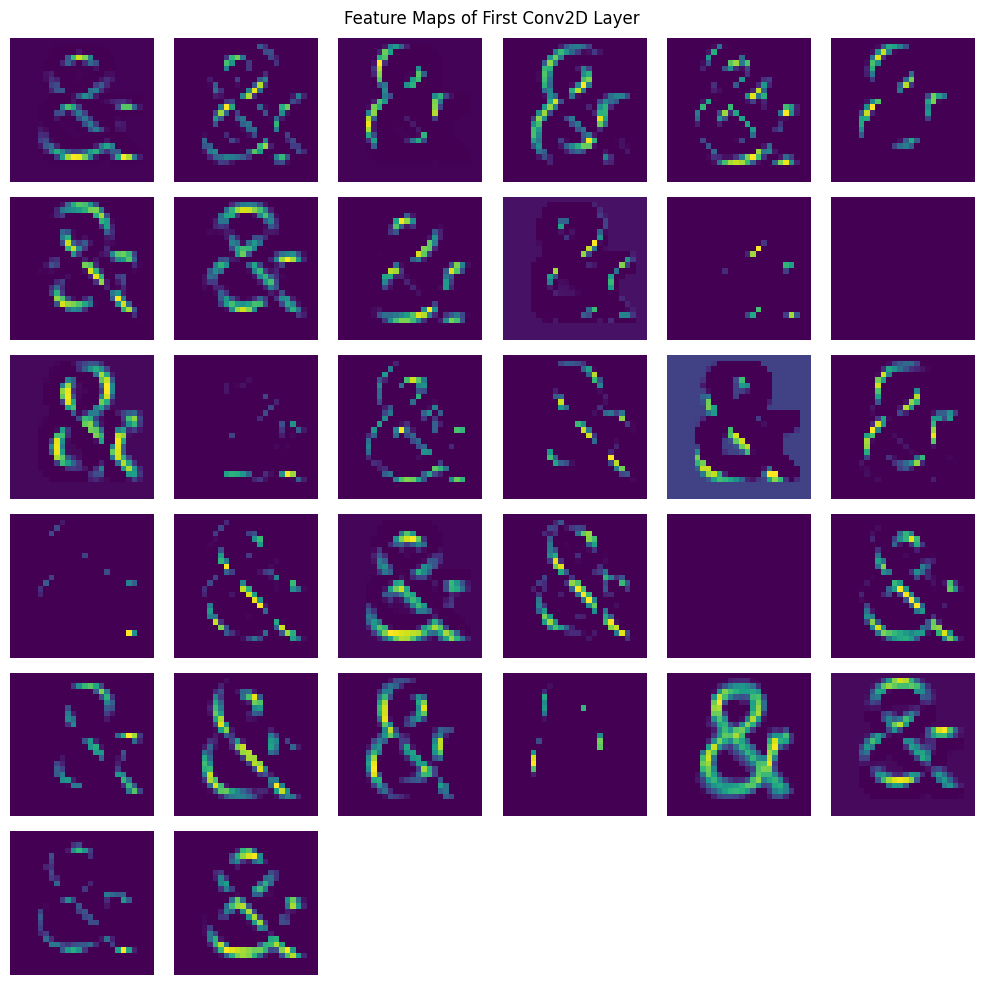

In [26]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Choose a random image from the test set
img_idx = 0  # Change this to any index you want to visualize
img = X_test[img_idx].reshape(1, 28, 28, 1)

# Define a new model to output the feature maps of the first convolutional layer
layer_outputs = [layer.output for layer in cnn_model.layers[:2]]  # Get the outputs of the first Conv2D and MaxPooling2D layers
activation_model = Model(inputs=cnn_model.input, outputs=layer_outputs)

# Get the activations of the chosen image for the first Conv2D and MaxPooling2D layers
activations = activation_model.predict(img)

# Visualize the feature maps
first_conv_layer_activation = activations[0]
plt.figure(figsize=(10, 10))
for i in range(32):  # 32 is the number of filters in the first Conv2D layer
    plt.subplot(6, 6, i + 1)
    plt.imshow(first_conv_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.suptitle('Feature Maps of First Conv2D Layer')
plt.tight_layout()
plt.show()


In this case, there are 32 filters applied to each input image, resulting in 32 feature maps for each input.

The color intensity in each feature map represents the activation strength of the corresponding filter at different spatial locations within the input image. Brighter regions indicate higher activations, while darker regions indicate lower activations.

Feature maps capture different patterns or features present in the input images. By examining these feature maps, we can gain insights into what specific patterns the filters are detecting. In early layers of the CNN, these patterns might be simple, such as edges, corners, or textures.

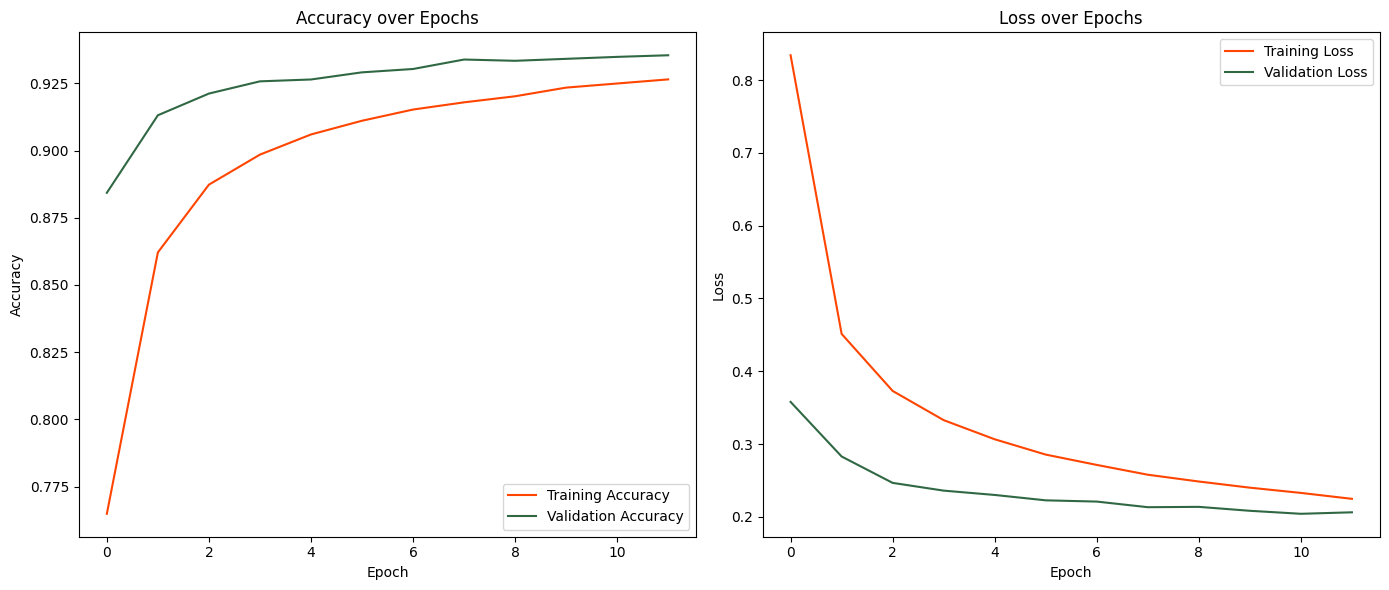

In [34]:
# Initializing the plotting area for both accuracy and loss
plt.figure(figsize=(14, 6))

# Plotting Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='#FF4500')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#306844')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='#FF4500')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#306844')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

The increasing trends in both training accuracy and decreasing trends in training loss indicate that the model is learning from the training data over the epochs. This is a positive sign as it shows that the model is making progress and improving its performance on the training set.

The validation accuracy and validation loss provide insights into how well the model generalizes to unseen data. The increasing validation accuracy and decreasing validation loss suggest that the model is also performing well on the validation set, indicating good generalization ability.

**CONCLUSION**

The CNN model, with its specialized architecture for image data, achieves superior accuracy of 93.99% on the test set.

Its ability to learn hierarchical representations, handle spatial dependencies, and prevent overfitting makes it ideal for image classification tasks.

This performance surpasses the DNN model's accuracy of 83.71%, showcasing the effectiveness of CNNs for image recognition tasks.

**CONTRIBUTORS**

Vineeth Reddy Singireddy

NikBearBrown

**LICENSE**

MIT License

Copyright (c) 2024 vineethreddy2000

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

**REFERENCES**

The reference for the dataset "TMNIST Alphabet (94 characters)" on Kaggle is:

[TMNIST Alphabet (94 characters)](https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters)


OpenAI's ChatGPT for providing guidance and explanations on neural networks and machine learning concepts.

Uthayasuriyan, A. (2023). TMNIST: Tamil Handwritten Digits [Data set].Kaggle.

 https://www.kaggle.com/code/agashuthayasuriyan/tmnist-agash-uthayasuriyan
